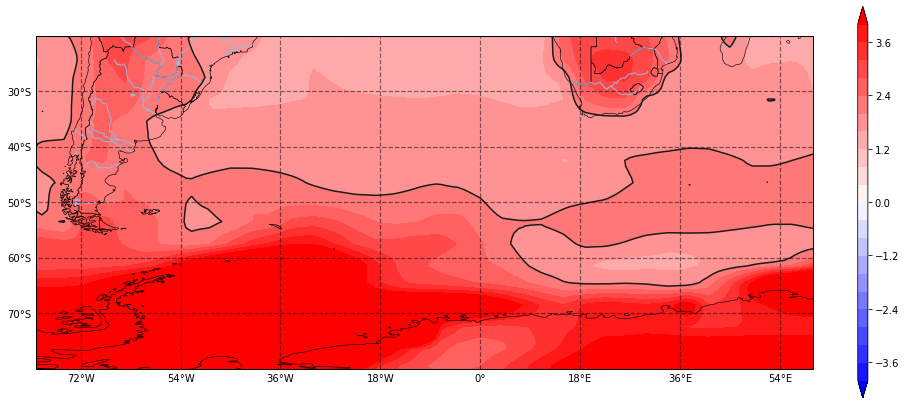

In [19]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point

ds = xr.open_dataset("/Users/zhengkai/OneDrive/master_road/script/python/pyncl/self/Eoi400-Eoi280_echam5_last100year_catted_ts_ymonmean_r360x180_ANN.nc")
# print(ds['lat'][:])
# print(ds)

temp0 = ds['tsurf'][0,:,:]
temp1 = add_cyclic_point(temp0)
temp=xr.DataArray(temp1,
                 {'lat': np.arange(-89.5,89.6,1),
                  'lon': np.arange(361)},
                 ('lat', 'lon'))

# print(temp)
lons = ds.lon.data
lats = ds.lat.data
# print(lons)
# temp = xr.DataArray(t.data.T, coords=[lats,lons], dims=['latitude','longitude'])

# 创建画图空间
box=[-80,60,-80,-20]
proj = ccrs.PlateCarree() #创建投影
fig = plt.figure(figsize=(16,9)) #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj}) #子图
ax.set_extent(box, crs=ccrs.PlateCarree())
# 设置地图属性:加载国界、海岸线、河流、湖泊
ax.add_feature(cfeat.BORDERS.with_scale('50m'), linewidth=0.8, zorder=1)
ax.add_feature(cfeat.COASTLINE.with_scale('50m'), linewidth=0.6, zorder=1) 
ax.add_feature(cfeat.RIVERS.with_scale('50m'), zorder=1) 
ax.add_feature(cfeat.LAKES.with_scale('50m'), zorder=1) 
# 设置网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xformatter = LONGITUDE_FORMATTER #x轴设为经度格式
gl.yformatter = LATITUDE_FORMATTER #y轴设为纬度格式
# 设置colorbar
cbar_kwargs = {
'orientation': 'horizontal',
'label': 'Potential',
'shrink': 0.8,
}
# 画图
levels = np.arange(-4,4.1,0.4)
# temp.plot.contourf(ax=ax, levels=levels, cmap='bwr',cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree(),add_colorbar=True, extend='both')
CS=temp.plot.contourf(ax=ax, levels=levels,transform=ccrs.PlateCarree(),cmap='bwr',add_colorbar=False,extend='both')
cbar=fig.colorbar(CS,orientation='vertical',aspect=35, shrink=0.8,fraction=0.08, pad=0.05)
# temp.plot.contourf(ax=ax, vmin=-3, vmax=3.1, cmap='bwr',cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree(),add_colorbar=True, extend='both')
# plt.savefig('test.jpg')  
# temp.plot.contourf(ax=ax,levels=[0,0.001],colors='#1A1A1A',add_colorbar=False) #cant
lons1 = temp.lon.data
lats1 = temp.lat.data
X2,Y2 = np.meshgrid(lons1,lats1)
plt.contour(X2,Y2,temp,levels=[2],colors='#1A1A1A')